<a href="https://colab.research.google.com/github/amitverma7426/DataScience/blob/main/Analyze_the_wildlife_activities_in_Austrilia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [3]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"


In [4]:
df = pd.read_csv(filepath)

In [5]:
df

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N


In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [7]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


In [8]:
df['Year']

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
26401    2020
26402    2020
26403    2020
26404    2020
26405    2020
Name: Year, Length: 26406, dtype: int32

In [9]:
df['Month']

0         1
1         1
2         1
3         1
4         1
         ..
26401    10
26402    10
26403    10
26404    10
26405    10
Name: Month, Length: 26406, dtype: int32

In [10]:
 df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

In [11]:
df

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N,2020,10
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N,2020,10
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,2020,10
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,2020,10


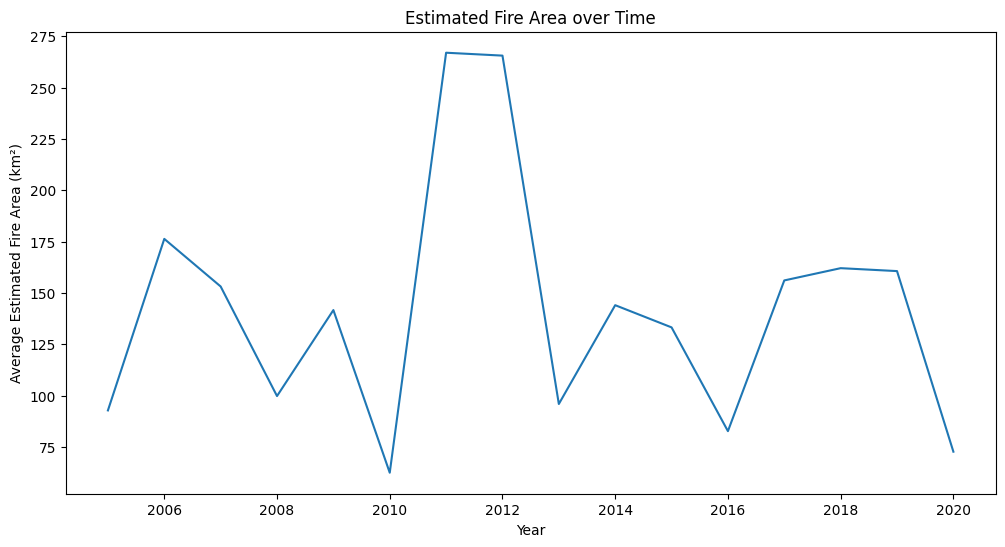

In [12]:
plt.figure(figsize=(12, 6))
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

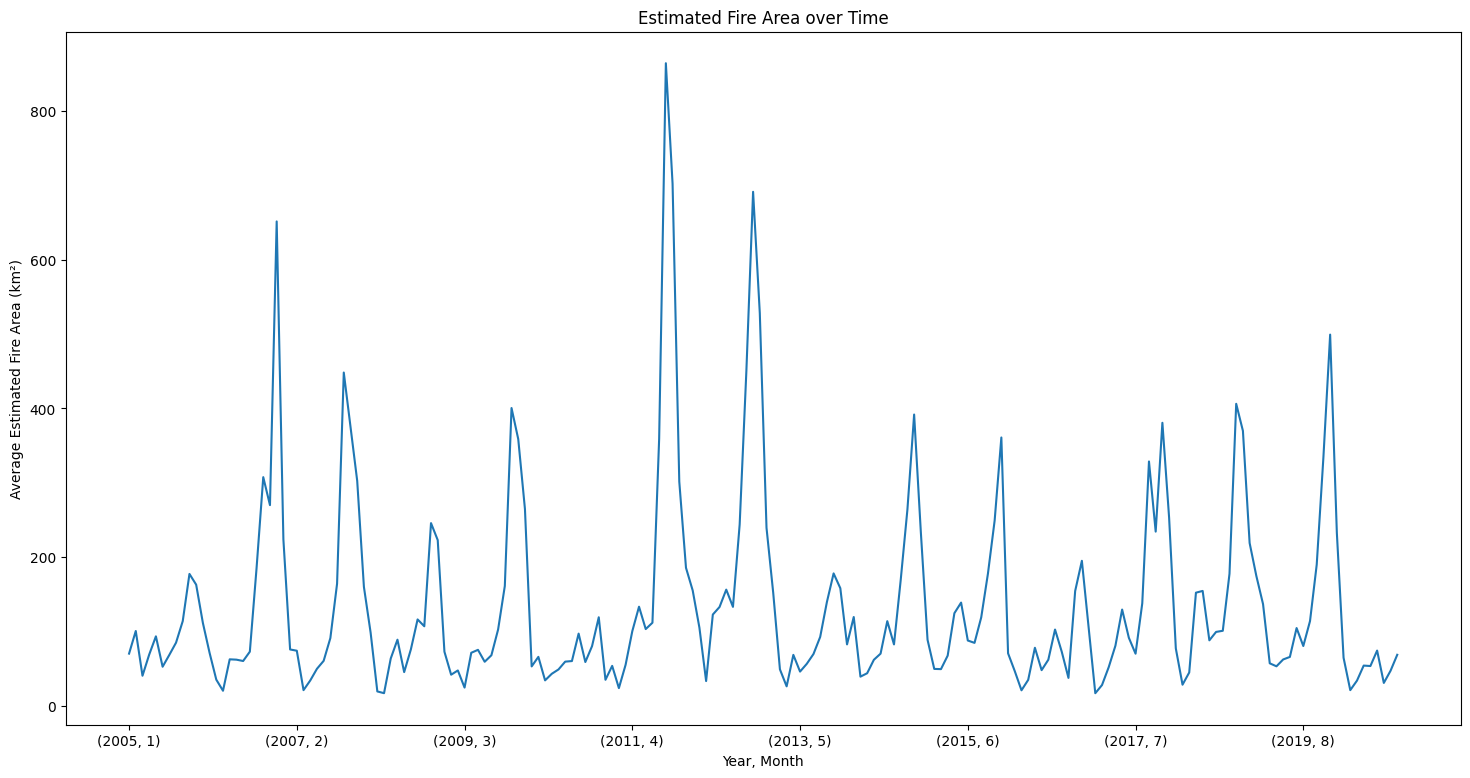

In [13]:
plt.figure(figsize=(18, 9))
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

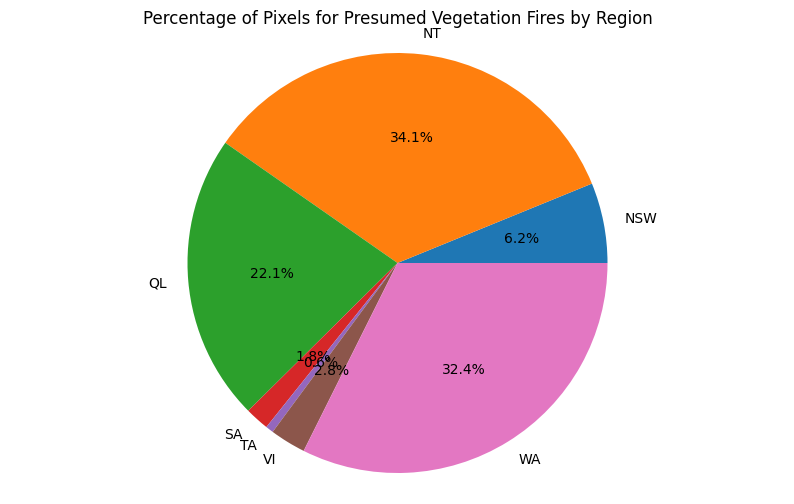

In [14]:
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()


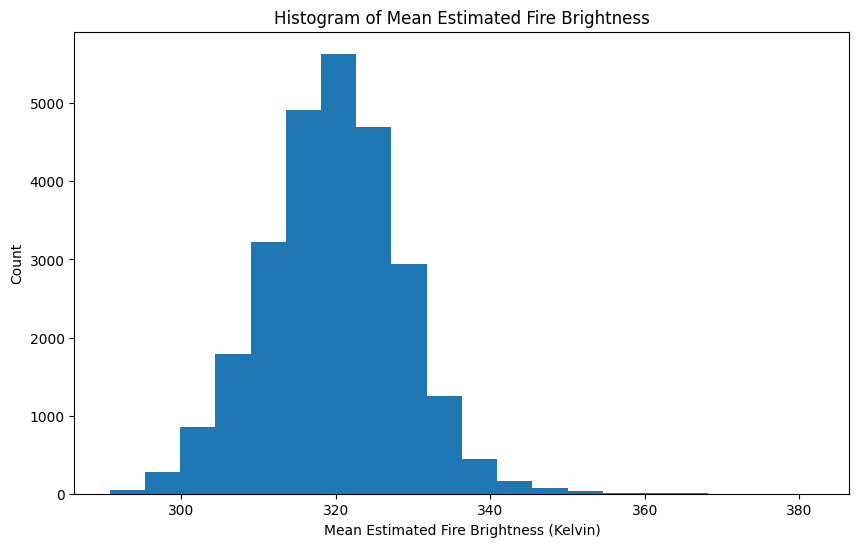

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()


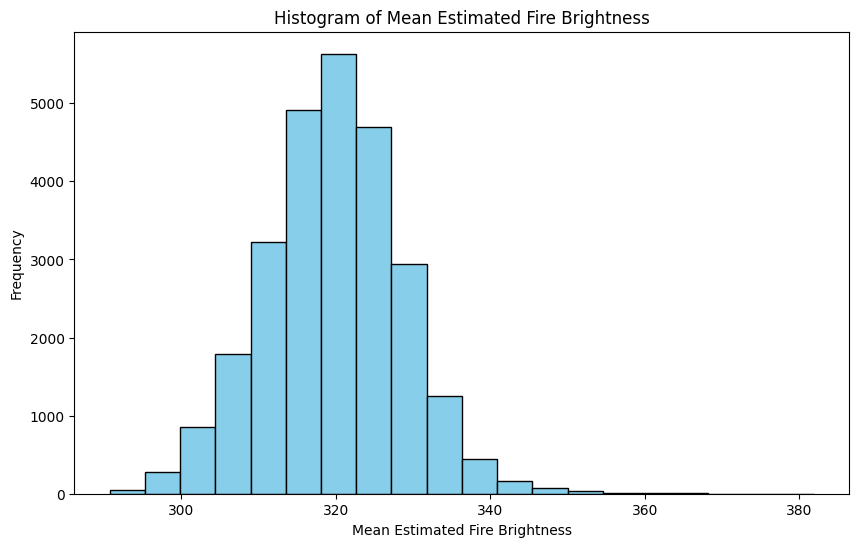

In [16]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(df['Mean_estimated_fire_brightness'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Estimated Fire Brightness')

# Show the plot
plt.show()


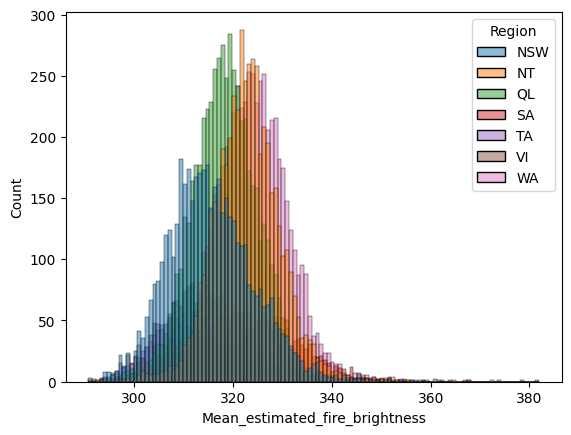

In [17]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

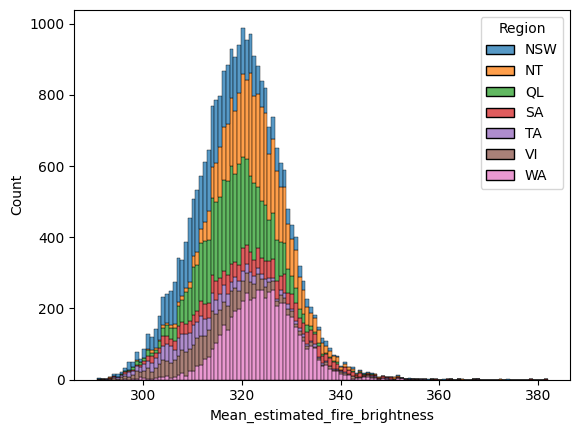

In [18]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

In [19]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [21]:
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)